# Анализ убытков развлекательного приложения

## Загружаю данные и подготовливаю их к анализу

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

### Данные о визитах.
    
Изучу эти данные и выполните предобработку. Проверю данные на пропуски и дубликаты. Проверю, что типы данных во всех колонках соответствуют сохранённым в них значениям.

In [3]:
# вывожу первые 5 строчек датафрейма visits на экран для ознакомления
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
# вывожу основную информацию о датафрейме с помощью метода info()
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
# вывожу количество пропущенных значений
display(visits.isna().sum().sum())

# проверяю на наличие явных дубликатов
visits.duplicated().sum()

0

0

**Вывод:** Изучив полученную информацию о данных можно сказать следующее:
* Наименования столбцов не соответствуют стилю кода. Необходимо привести их к нижнему регистру и заменить пробелы на знак нижнего подчеркивания.
* Данные столбцов `Session Start` и `Session End` необходимо преобразовать в нужный тип для работы со временем.
* Пропущенных значений нет.
* Явных дубликатов нет.

In [6]:
# привожу наименования столбцов к нижнему регистру
visits.columns = visits.columns.str.lower()

# изменяю наименование некоторых столюцов
visits = visits.rename(columns={'user id':'user_id', 'session start':'session_start', 'session end':'session_end'})

In [7]:
# преобразовываю данные о времени в необходимый для работы тип
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

### Данные о заказах.
    
Изучу эти данные и выполните предобработку. Проверю данные на пропуски и дубликаты. Проверю, что типы данных во всех колонках соответствуют сохранённым в них значениям.

In [8]:
# вывожу первые 5 строчек датафрейма orders на экран для ознакомления
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [9]:
# вывожу основную информацию о датафрейме с помощью метода info()
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [10]:
# вывожу количество пропущенных значений для каждого столбца
display(orders.isna().sum().sum())

# проверяю на наличие явных дубликатов
orders.duplicated().sum()

0

0

**Вывод:** Изучив полученную информацию о данных можно сказать следующее:
* Наименования столбцов не соответствуют стилю кода. Необходимо привести их к нижнему регистру и заменить пробелы на знак нижнего подчеркивания.
* Данные столбца `Event Dt` необходимо преобразовать в нужный тип для работы со временем.
* Пропущенных значений нет.
* Явных дубликатов нет.

In [11]:
# привожу наименования столбцов к нижнему регистру
orders.columns = orders.columns.str.lower()

# изменяю наименование некоторых столюцов
orders = orders.rename(columns={'user id':'user_id', 'event dt':'event_dt'})

In [12]:
# преобразовываю данные о времени в необходимый для работы тип
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

### Данные о расходах.
    
Изучу эти данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Проверю, что типы данных во всех колонках соответствуют сохранённым в них значениям.

In [13]:
# вывожу первые 5 строчек датафрейма costs на экран для ознакомления
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [14]:
# вывожу основную информацию о датафрейме с помощью метода info()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [15]:
# вывожу количество пропущенных значений для каждого столбца
display(costs.isna().sum().sum())

# проверяю на наличие явных дубликатов
costs.duplicated().sum()

0

0

**Вывод:** Изучив полученную информацию о данных можно сказать следующее:
* Наименования столбца `Channel` не соответствует стилю кода. Необходимо привести его к нижнему регистру.
* Данные столбца `dt` необходимо преобразовать в нужный тип для работы со временем.
* Пропущенных значений нет.
* Явных дубликатов нет.

In [16]:
# привожу наименование столбца к нижнему регистру
costs.columns = costs.columns.str.lower()

In [17]:
# преобразовываю данные о времени в необходимый для работы тип
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

**ВЫВОД:** Данные загружены, изучены и произведены все необходимые преобразования. Данные готовы для дальнейшего анализа.

## Задаю функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

## Исследовательский анализ данных

### Составлю профили пользователей. Определю минимальную и максимальную даты привлечения пользователей.

In [26]:
# составляю профили пользователей
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [27]:
# определяю минимальную и максимальную даты привлечения пользователей
min_analysis_date = profiles['dt'].min()
max_analysis_date = profiles['dt'].max()

min_analysis_date, max_analysis_date

(datetime.date(2019, 5, 1), datetime.date(2019, 10, 27))

**Вывод:** На основани данных из трёх таблиц и с помощью финкции `get_profiles` составила сводную таблицу с профилями пользователей. Так же определила минимальную дату привлечения - 2019-05-01, и максимальную дату привлечения - 2019-10-27.
    
Полученные данные соответствуют значениям минимальной и максимальной датам, заявленным в ТЗ.

### Выясню, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построю таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [28]:
# построю таблицу, отражающую количество пользователей и долю платящих из каждой страны
pro_region = profiles.groupby('region').agg({'user_id': 'nunique', 'payer': 'mean'}).sort_values(by='payer', ascending=False)
pro_region['payer'] = (pro_region['payer'] * 100).round(1)
pro_region

,user_id,payer
region,,
United States,100002,6.9
Germany,14981,4.1
UK,17575,4.0
France,17450,3.8


**Вывод:** В приложение приходят пользователи из США, Германии, Великобритании и Франции. Большую часть составляют пользователи из США, так же на эту страну приходится больше всего платящих пользователей - 6.9%. Далее следуют Германия - 4.1%,  Великобритания - 4% и Франция - 3.8%.

###  Узнаю, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построю таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [29]:
# построию таблицу, отражающую количество пользователей и долю платящих на каждом устройстве
pro_dev = profiles.groupby('device').agg({'user_id': 'nunique', 'payer': 'mean'}).sort_values(by='payer', ascending=False)
pro_dev['payer'] = (pro_dev['payer'] * 100).round(1)
pro_dev

,user_id,payer
device,,
Mac,30042,6.4
iPhone,54479,6.2
Android,35032,5.9
PC,30455,5.0


**Вывод:** Клиенты пользуются следующими устройствами: Mac, iPhone, Android и PC. Платящие пользователи предпочитают Mac - 6.4% и iPhone - 6.2%. Немного отстают пользователи Android - 5.9% и на последнем месте РС - 5%.

### Изучу рекламные источники привлечения и определю каналы, из которых пришло больше всего платящих пользователей. Построю таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [30]:
# построию таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения
pro_ch = profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': 'mean'}).sort_values(by='payer', ascending=False)
pro_ch['payer'] = (pro_ch['payer'] * 100).round(1)
pro_ch

,user_id,payer
channel,,
FaceBoom,29144,12.2
AdNonSense,3880,11.3
lambdaMediaAds,2149,10.5
TipTop,19561,9.6
RocketSuperAds,4448,7.9
WahooNetBanner,8553,5.3
YRabbit,4312,3.8
MediaTornado,4364,3.6
LeapBob,8553,3.1


**Вывод:** Большего всего пользователей пришло самостоятельно (56439), но доля платящих у таких пользователей сама низкая - 2%. На втором месте по количеству привлеченных клиентов канал FaceBoom (29144), а по доли платящих он оказался на первом месте - 12.2%. На третьем месте по привлечению канал TipTop (19561).

**ОБЩИЙ ВЫВОД ПО ИССЛЕДОВАТЕЛЬСКОМУ АНАЛИЗУ:** 
* Аналих данных о привлечении новых клиентов проводится за период с 1 мая 2019 года по 27 октября 2019 года.
* В приложение приходят пользователи из четырех стран - США, Германия, Великобритания и Франция, из 10 рекламных источников.
* Большую часть составляют пользователи из США, так же на эту страну приходится больше всего платящих пользователей - 6.9%. Далее следуют Германия - 4.1%, Великобритания - 4% и Франция - 3.8%.
* Клиенты пользуются следующими устройствами: Mac, iPhone, Android и PC. Платящие пользователи предпочитают Mac - 6.4% и iPhone - 6.2%. Немного отстают пользователи Android - 5.9% и на последнем месте РС - 5%.
* Большего всего пользователей пришло из источников `FaceBoom` (29144) и `TipTop` (19561).
* Доля платящих пользователей из источника `FaceBoom` - 12.2%

## Маркетинг

### Посчитаю общую сумму расходов на маркетинг.

In [31]:
# посчитаю общую сумму расходов на маркетинг
profiles['acquisition_cost'].sum().round()

105497.0

Всего на маркетинг было потрачено 105497 долларов

### Выясню, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [32]:
# выясню, как траты распределены по рекламным источникам
profiles.groupby('channel').agg({'acquisition_cost': 'sum'}).sort_values(by = 'acquisition_cost', ascending=False)

,acquisition_cost
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Больше всего денег потратили на TipTop (54751,30) и FaceBoom (32445,60).

### Построю визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постараюсь отразить это на одном графике.

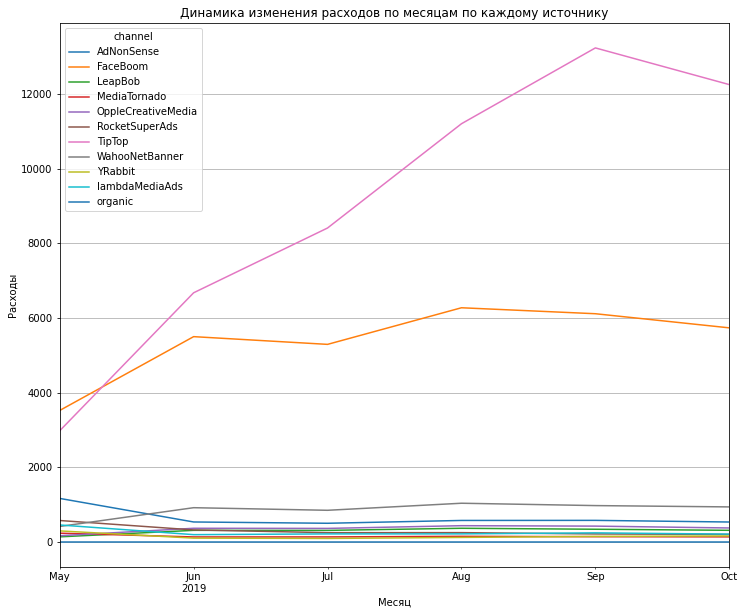

In [33]:
# Построю визуализацию динамики изменения расходов по месяцам по каждому источнику
(
    profiles.pivot_table(index='month', columns='channel', values='acquisition_cost', aggfunc='sum')
    .plot(grid=True, figsize=(12, 10))
)
plt.title('Динамика изменения расходов по месяцам по каждому источнику')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.show()

**Вывод:** Расходы на источник TipTop стремительно растет с мая по сентябрь и в сентябре немного снижаются.
У других источников расходы стабильны, но у FaceBoom они значительно выше, чем у других.

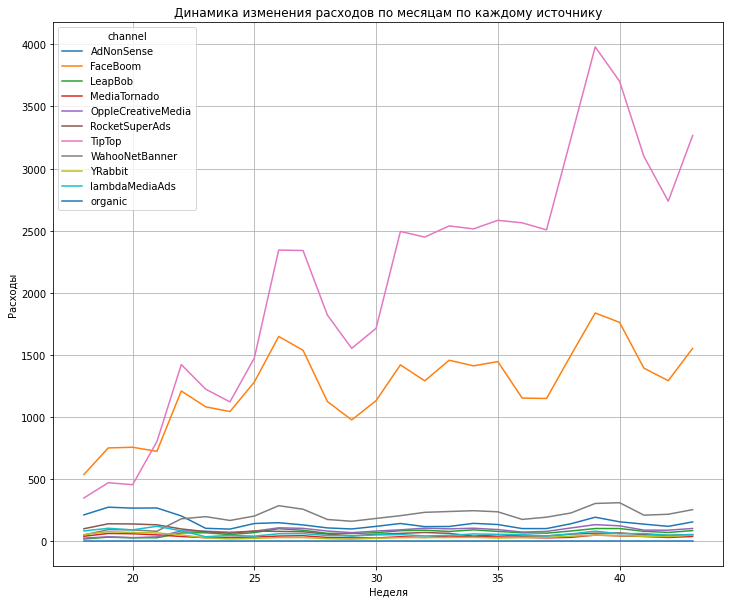

In [34]:
# Построю визуализацию динамики изменения расходов по неделям по каждому источнику
profiles['dt'] = pd.to_datetime(profiles['dt'])
profiles['week'] = profiles['dt'].dt.isocalendar().week
(
    profiles.pivot_table(index='week', columns='channel', values='acquisition_cost', aggfunc='sum')
    .plot(grid=True, figsize=(12, 10))
)
plt.title('Динамика изменения расходов по месяцам по каждому источнику')
plt.xlabel('Неделя')
plt.ylabel('Расходы')
plt.show()

**Вывод:** На графике сильно выделяются два источника привлечения новых пользователей, это TipTop и FaceBoom. Пиком расходов у обоих источников был на 39 неделе.

### Узнаю, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. 
Использую ждя этого профили пользователей


In [35]:
# нахожу среднюю стоимость привлечения одного пользователя из каждого источника
profiles.groupby('channel')['acquisition_cost'].mean().sort_values(ascending=False)

channel
TipTop                2.799003
FaceBoom              1.113286
AdNonSense            1.008054
lambdaMediaAds        0.724802
WahooNetBanner        0.602245
RocketSuperAds        0.412095
OppleCreativeMedia    0.250000
YRabbit               0.218975
MediaTornado          0.218717
LeapBob               0.210172
organic               0.000000
Name: acquisition_cost, dtype: float64

In [36]:
# посчитаю средний САС
profiles['acquisition_cost'].mean().round(2)

0.7

**Вывод:** Самый дорогой пользователь у источника TipTop - 2.8 доллара при средней стоимости привлечения одного клиента всех источников - 0.7 доллара. Второе и третье места разделяют FaceBoom - 1.11 и AdNonSense - 1 доллар. 

**ОБЩИЙ ВЫВОД ПО МАРКЕТИНГУ:**
* Общие расходы на маркетинг составили 105497 долларов, из них почти 52% потратили на `TipTop` (54751,30) и 30.75% на `FaceBoom` (32445,60).
* У этих двух источников привлечения новых клиентов самый дорогой САС 2.8 и 1.11 долларов соответственно.
* По графику визуализации динамики изменения расходов во времени по источникам четко заметны два лидера. Но видна разница. У источника `TipTop` расходы растут на протжении всего периода с пиком на 39 неделе. А у источника `FaceBoom` расходы более-менее стабильны, так же с небольшим пиком на 39 неделе.

## Оцениваю окупаемость рекламы

In [37]:
# задаю горизонт анализа
horizon_days = 14
# задаю момент анализа
observation_date = datetime(2019, 11, 1).date()

In [38]:
# исключаю из анализа органических пользователей. В анализе окупаемости рекламы они не понадобятся
profiles = profiles.query('channel != "organic"')

### Проанализирую окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

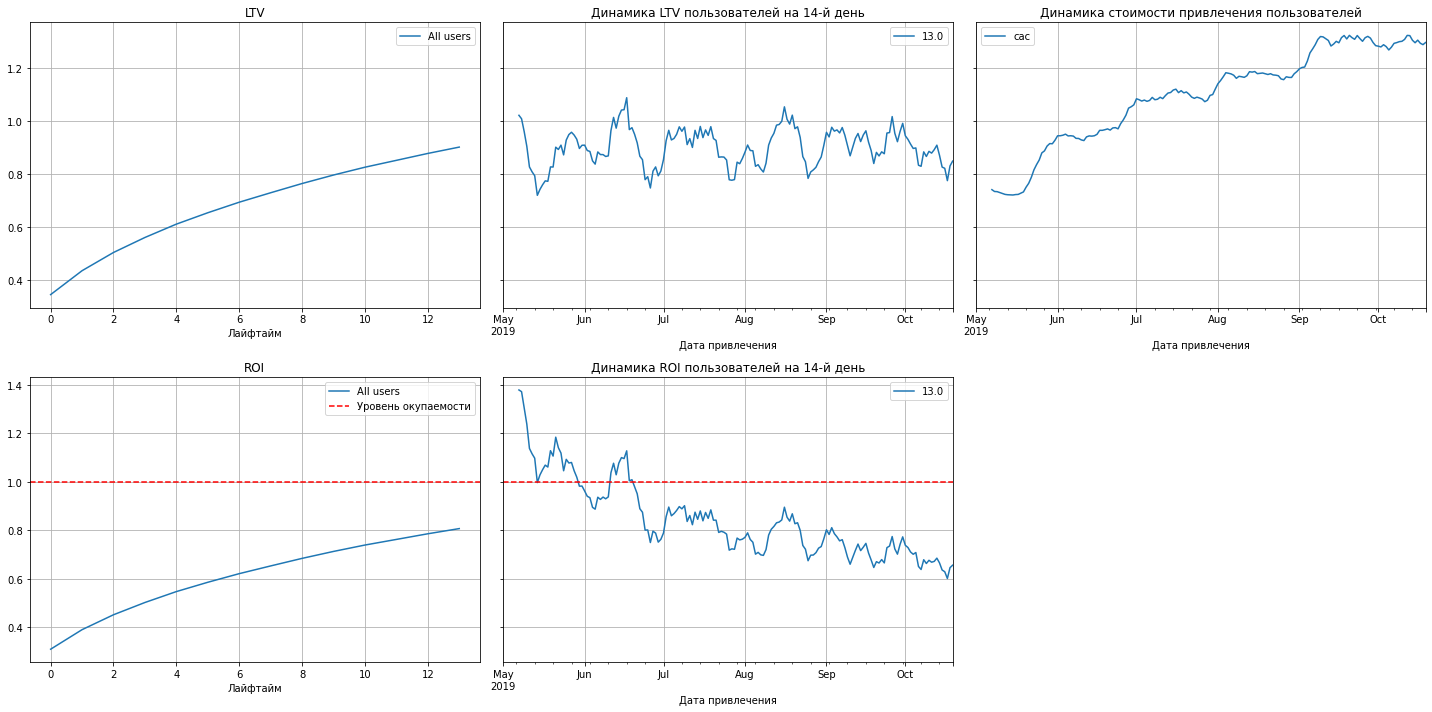

In [39]:
# считаю LTV и ROI с помощью функции
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строю графики динамики LTV, CAC и ROI
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Вывод:** По графикам можно сделать такие выводы:
* ROI в конце недели — чуть выше 80%.
* Динамика CAC постоянно растет.
* Динамика LTV достаточно стабильна, уровень LTV примерно одинаков на всем промежутке исследуемого периода.
* Динамика окупаемости снижается, в июле динамика ROI окончательно опустилась ниже 100%.
    
**Реклама не окупается**

### Проверю конверсию пользователей и динамику её изменения. То же самое сделаю с удержанием пользователей. 

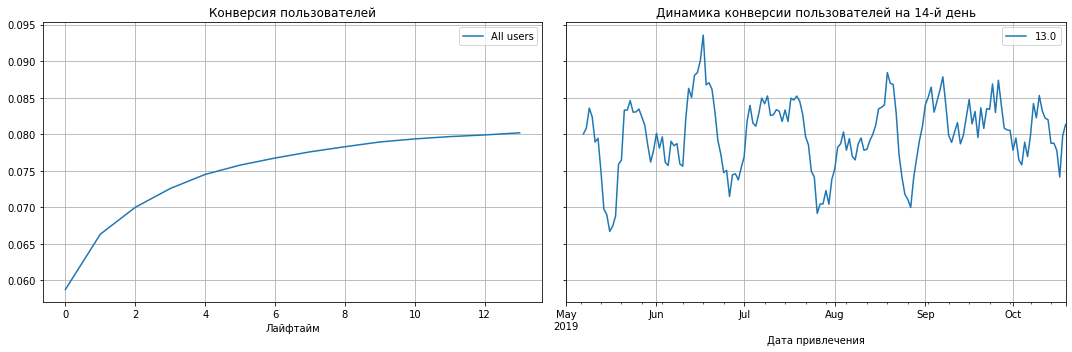

In [40]:
# проверяю конверсию пользователей
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

# строю динамику её изменения
plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Вывод:**  Конверсия всех пользователей постепенно растёт на протяжении всех 14 дней.

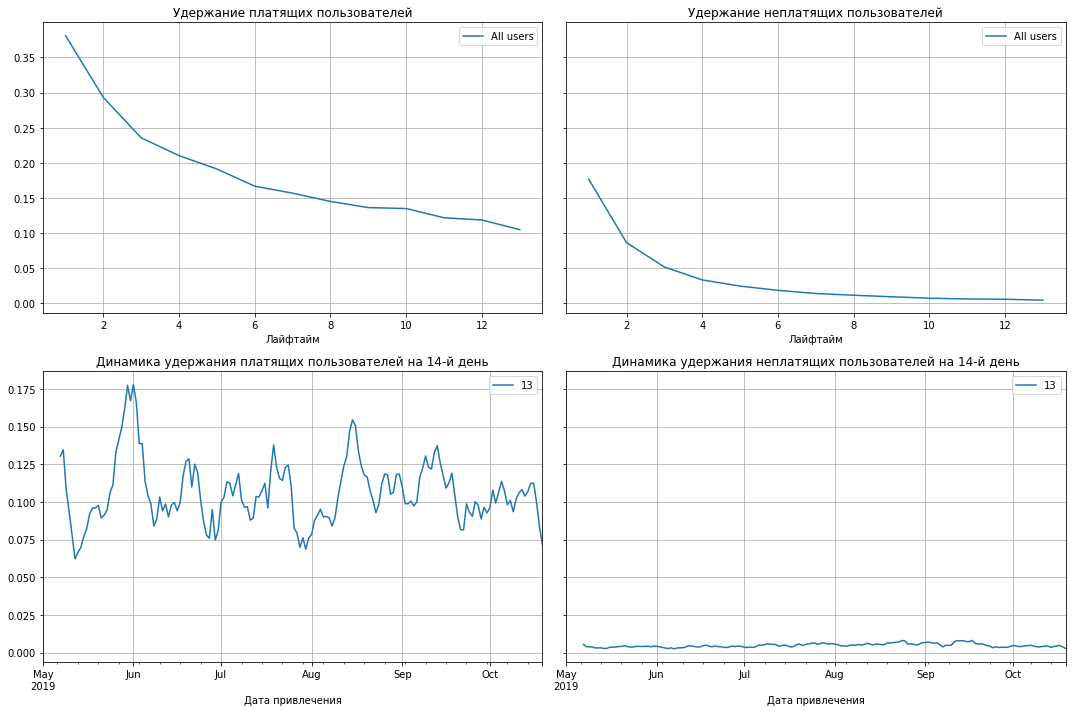

In [41]:
# проверяю удержание пользователей

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

# строю динамику его изменения
plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:** 
* Уровень удержания платящих пользователей выше, чем у неплатящих.
* Динамика удержания болнее-менее стабильна.

### Проанализирую окупаемость рекламы с разбивкой по устройствам. Построю графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

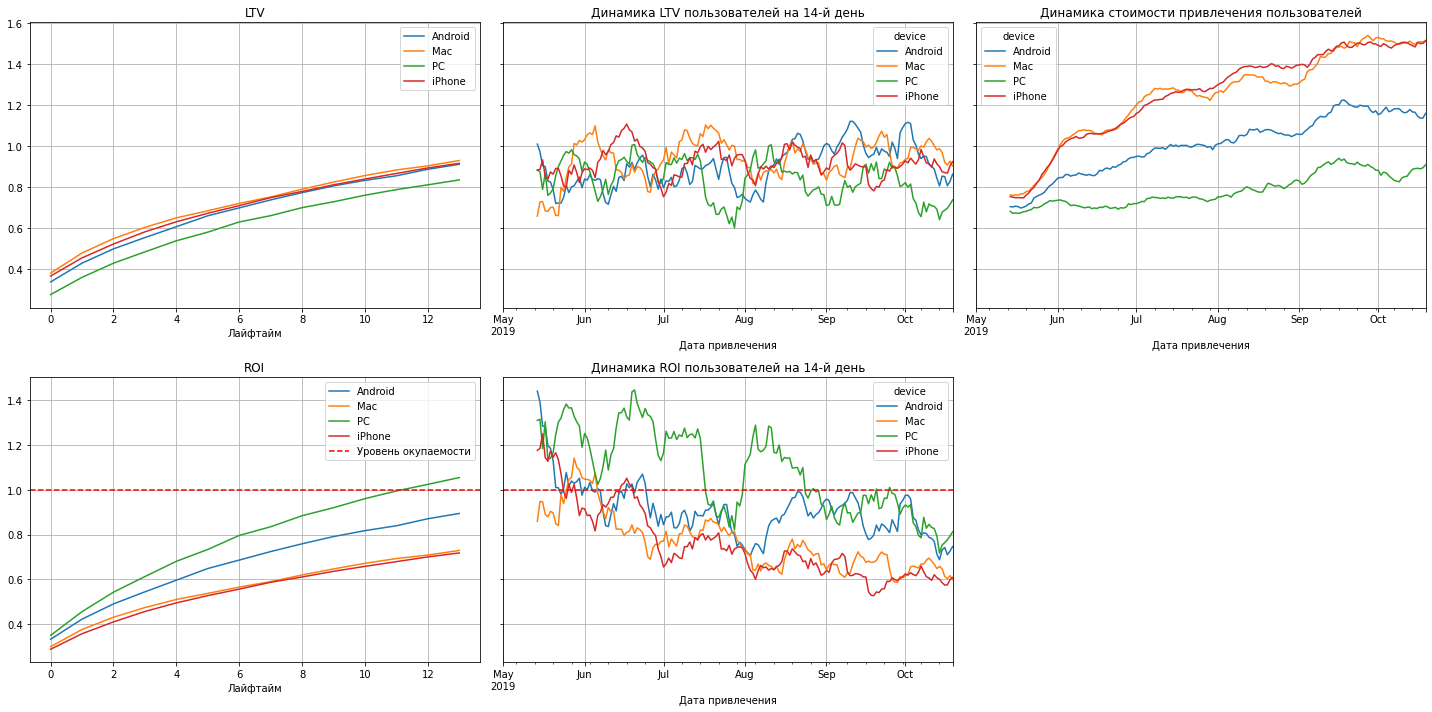

In [42]:
# смотрю окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вывод:** 
* Реклама стабильно не окупается для пользователей всех устройств. Только пользователи PC незначительно переходят порог окупаемости.
* На всех устройствах растет стоимость привлечения пользователей.
* LTV достаточно стабилен для всех устройств, уровень LTV примерно одинаков на всем промежутке исследуемого периода.
* Окупаемость пользователей РС снижается, в сентябре ROI окончательно опустился ниже предельного уровня (100%). Остальные устройства неокупаемые.

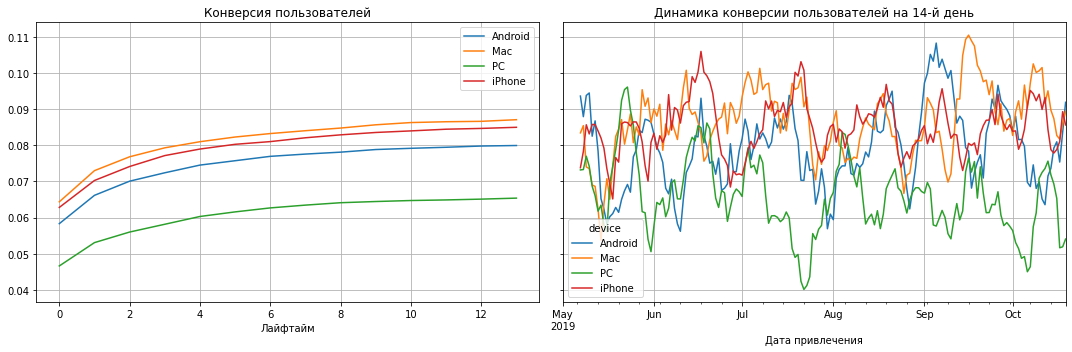

In [43]:
# проверяю конверсию пользователей в разрезе по устройствам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

# строю динамику её изменения
plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Вывод:** Конверсии пользователей всех устройств растет на протяжении всех 14 дней. Но у пользователей Mac и iPhone показатели выше. Намного отстают пользователи РС.

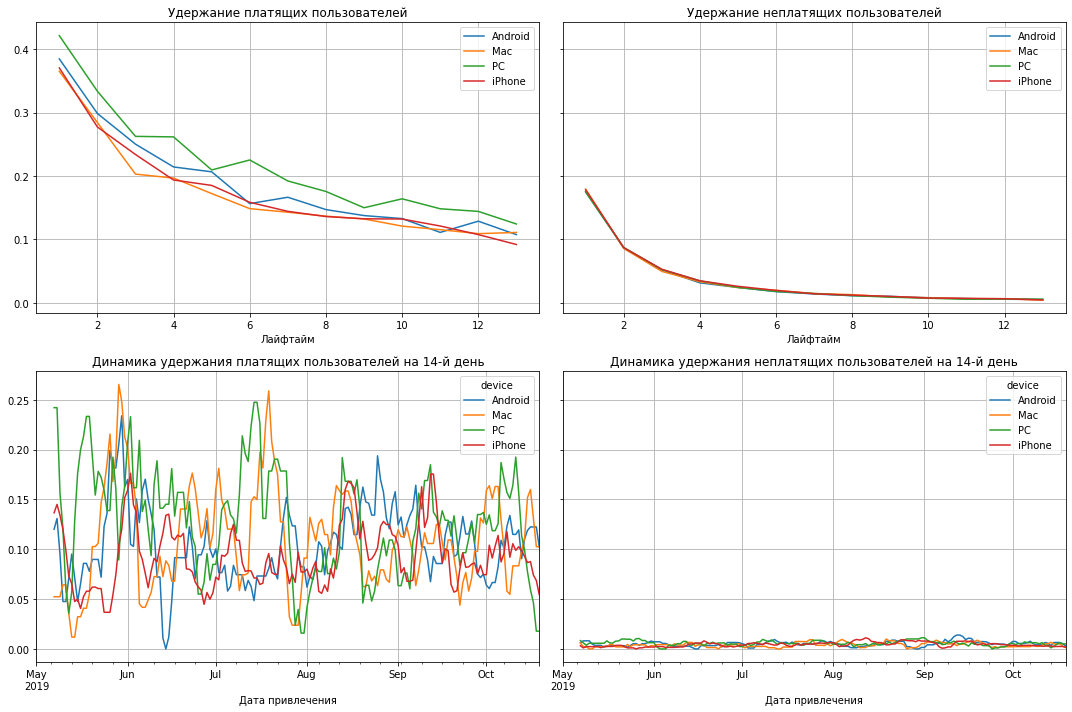

In [44]:
# проверяю удержание пользователей

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)

# строю динамику его изменения
plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:** 
* Уровень удержания платящих пользователей выше, чем у неплатящих. Лучше всех удерживаются пользователи РС.
* Динамика удержания более-менее стабильна.

### Проанализирую окупаемость рекламы с разбивкой по странам. Построю графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

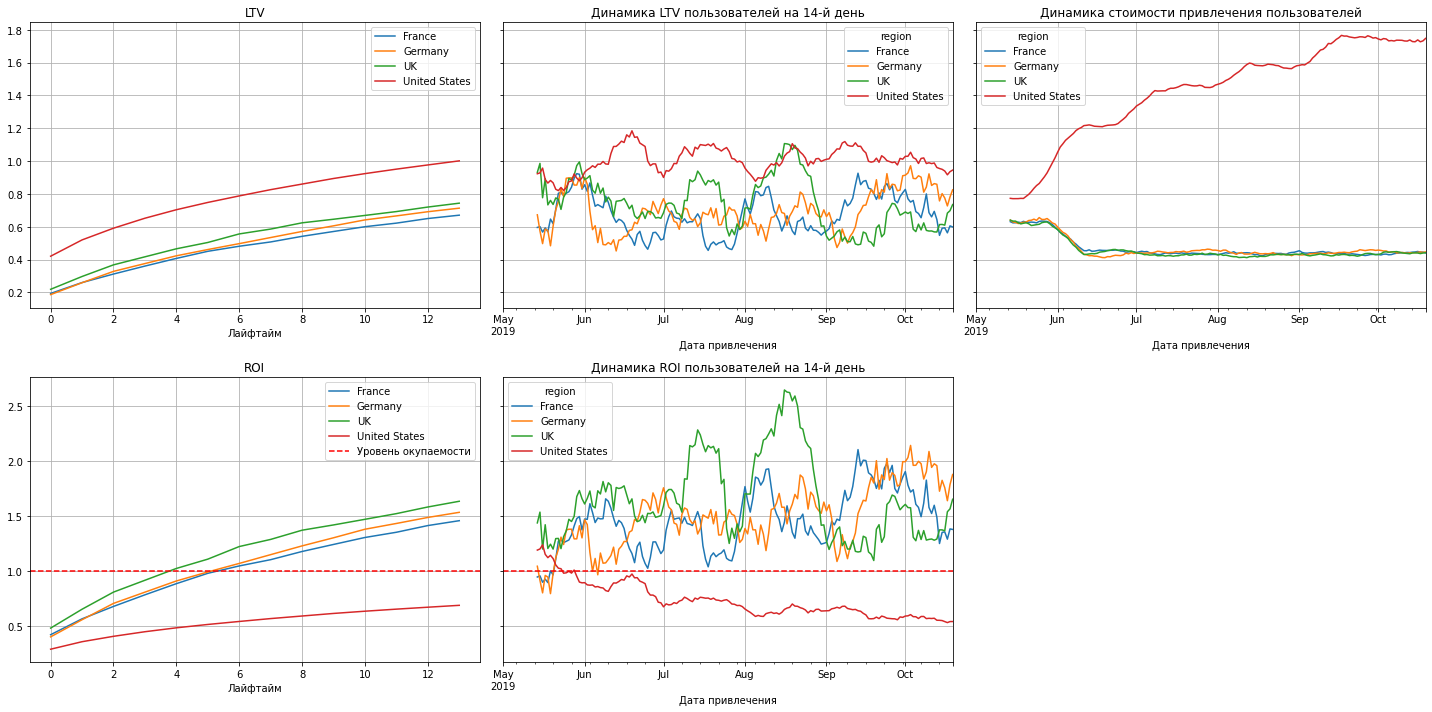

In [45]:
# смотрю окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вывод:** 
* У США самый большой LTV, постоянно растущие расходы на рекламу. Но при этом это единственная страна, у которой уровень окупаемости не достигает 100%.
* Другие страны показывают хорошие результаты (САС стабилен и расходы на рекламу окупаются).

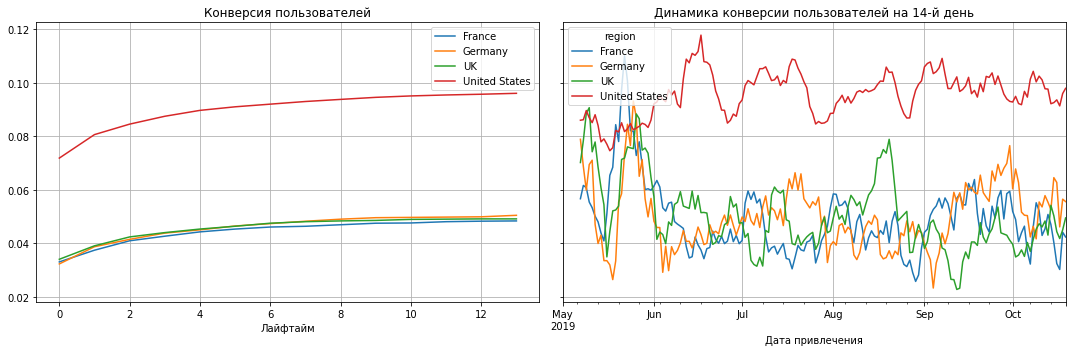

In [46]:
# проверяю конверсию пользователей в разрезе по странам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

# строю динамику её изменения
plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Вывод:** Лучше всего конвертируются пользователи из США.

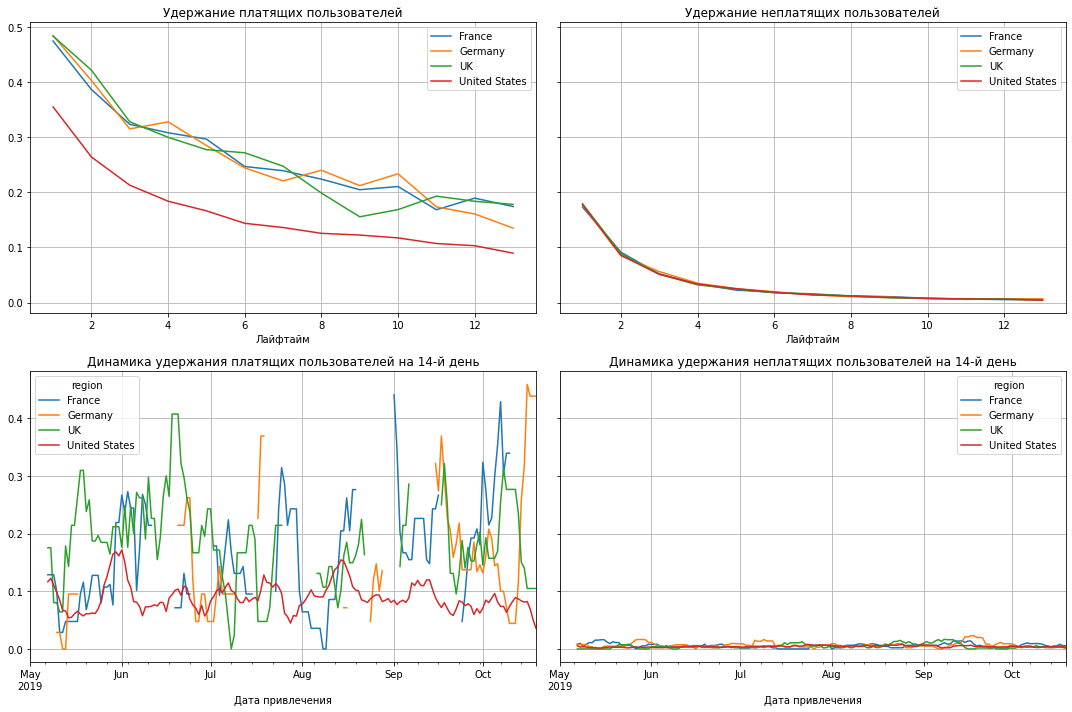

In [47]:
# проверяю удержание пользователей

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)

# строю динамику его изменения
plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:** Уровень удержания платящих пользователей в США намного ниже, чем в других странах.

### Проанализирую окупаемость рекламы с разбивкой по рекламным каналам. Построю графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

Раз проблема с окупаемостью рекламы только в США, то далее хочу посмотреть подробнее только американский регион.

#### Окупаемость рекламы с разбивкой по рекламным каналам в США.

In [48]:
# выбираю регион США
profiles_usa = profiles.query('region == "United States"')

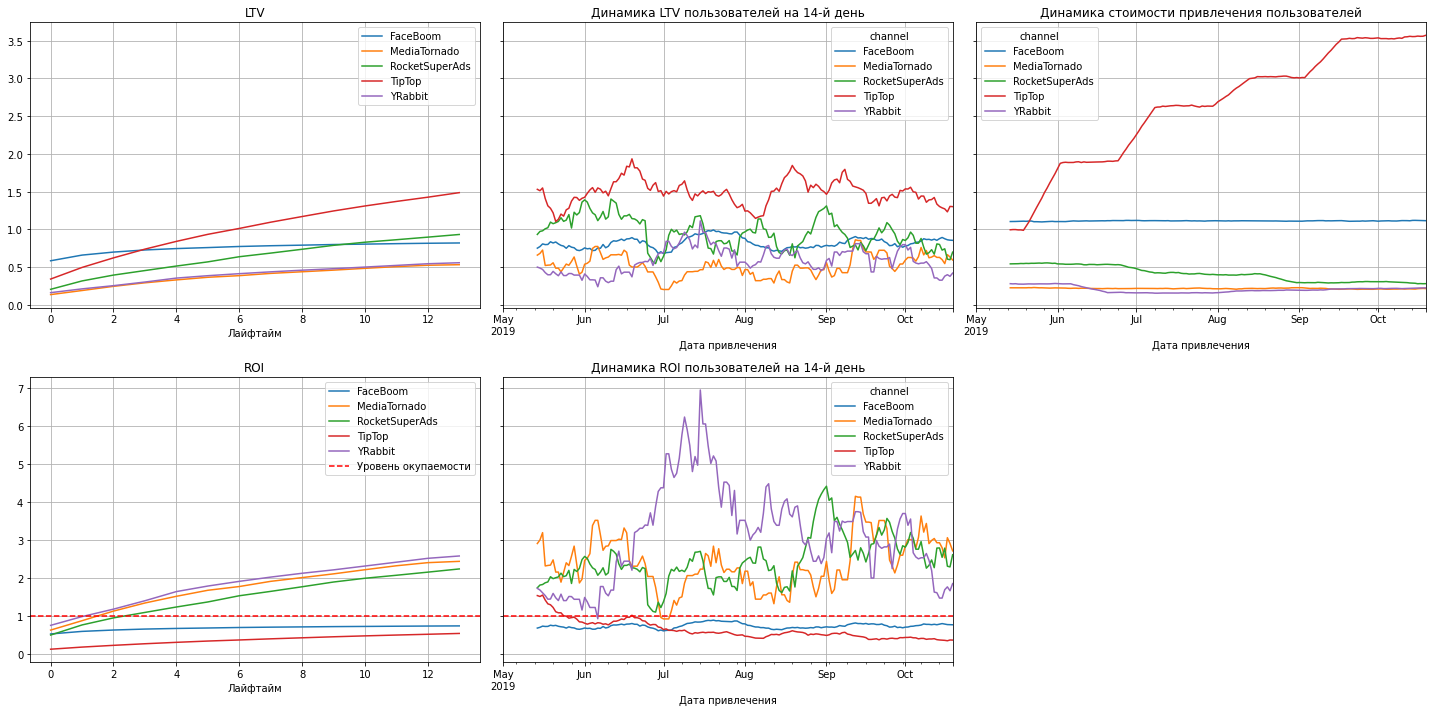

In [49]:
# смотрим окупаемость с разбивкой по рекламным каналам в США
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вывод:** 
* Очень высокие расходы на `TipTop`.
* Абсолютно убыточны два рекламных канала: `TipTop` и `FaceBoom`.
* При этом LTV источника `TipTop` показывает хороший рост.

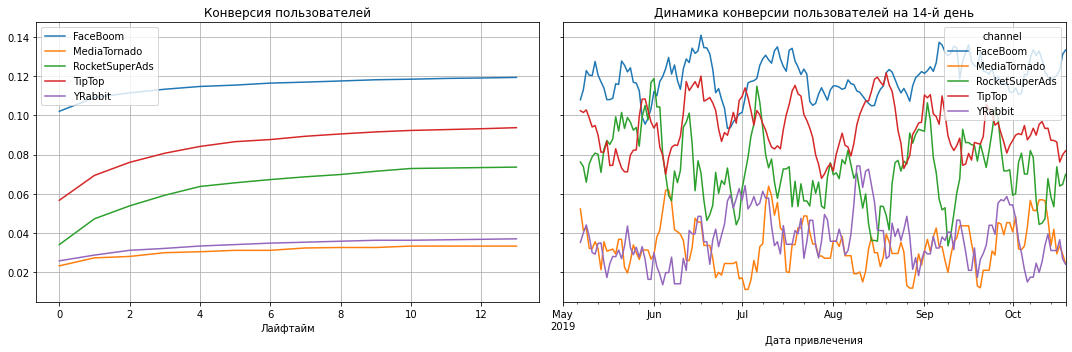

In [50]:
# проверяю конверсию пользователей с разбивкой по рекламным каналам в США
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_usa, orders, observation_date, horizon_days, dimensions=['channel']
)

# строю динамику её изменения
plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Вывод:**
* Конверсия канала FaceBoom практически на одном уровне на протяжении всего периода, но показатель достаточно высокий.
* Конверсия каналов YRabbit и MediaTornado не растет и показатель низкий.

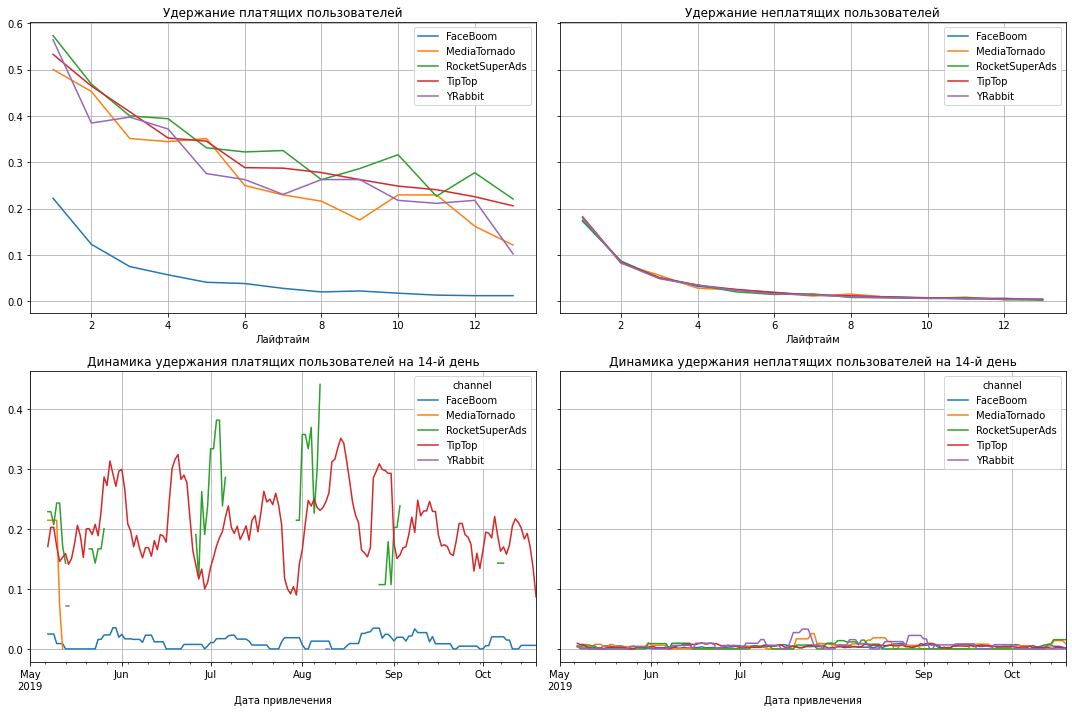

In [51]:
# проверяю удержание пользователей с разбивкой по рекламным каналам в США

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_usa, visits, observation_date, horizon_days, dimensions=['channel']
)

# строю динамику его изменения
plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:** Уровень удержания платящих пользователей канала FaceBoom имеет самые низкие показатели, а динамика удержания практически равна 0.

#### Окупаемость рекламы с разбивкой по рекламным каналам в Европе.

In [52]:
# выбираю страны Европы
profiles_eu = profiles.query('region != "United States"')

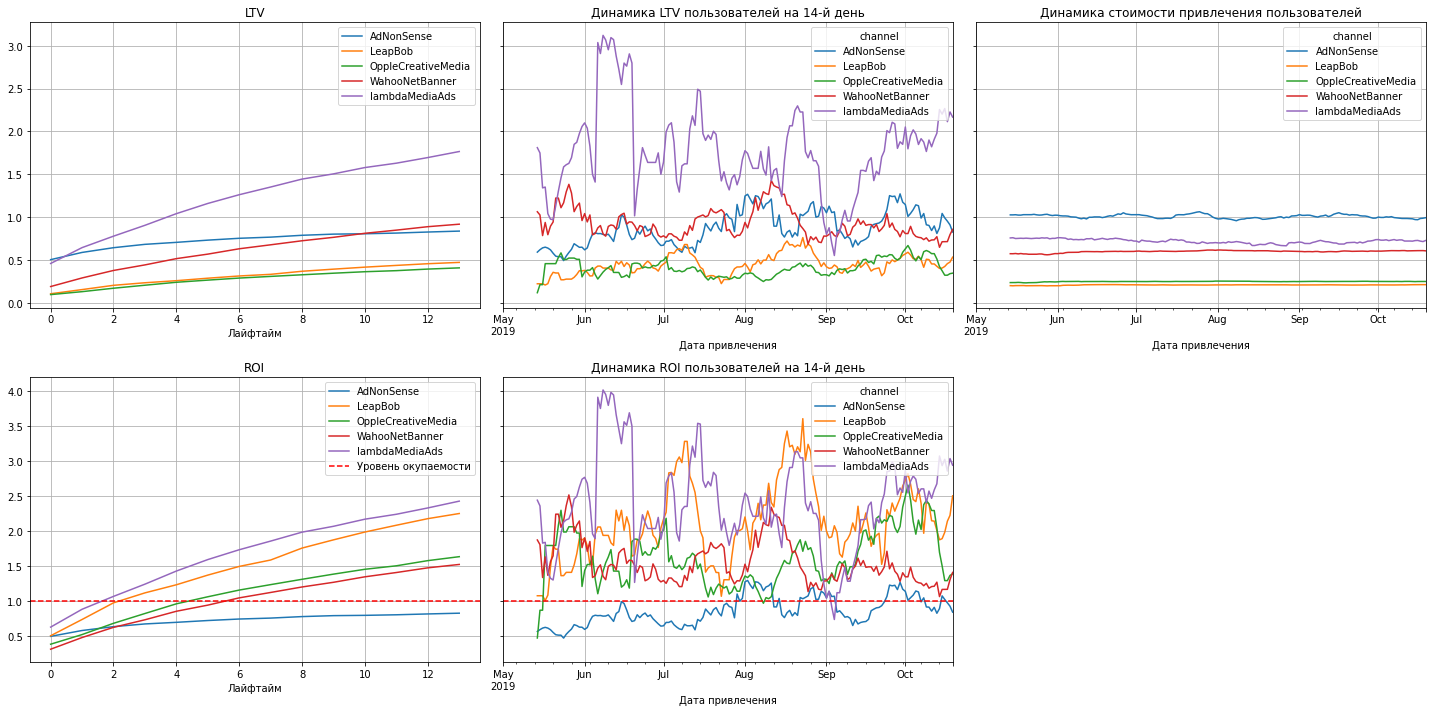

In [53]:
# смотрим окупаемость с разбивкой по рекламным каналам
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_eu, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вывод:** 
* Расходы на рекламу стабильны.
* Источник AdNonSense не достигает уровень окупаемости, однако стоимость привлечения достаточно высока.

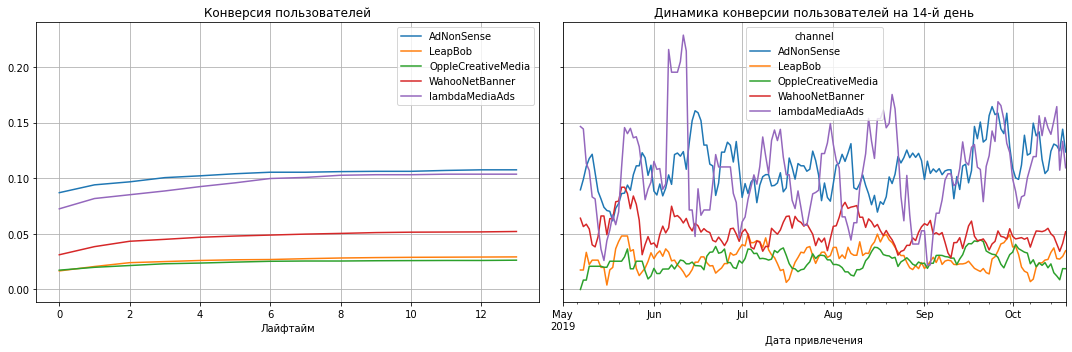

In [54]:
# проверяю конверсию пользователей с разбивкой по рекламным каналам в Европе
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_eu, orders, observation_date, horizon_days, dimensions=['channel']
)

# строю динамику её изменения
plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Вывод:** Конверсии пользователей на 2-3 день перестает расти.

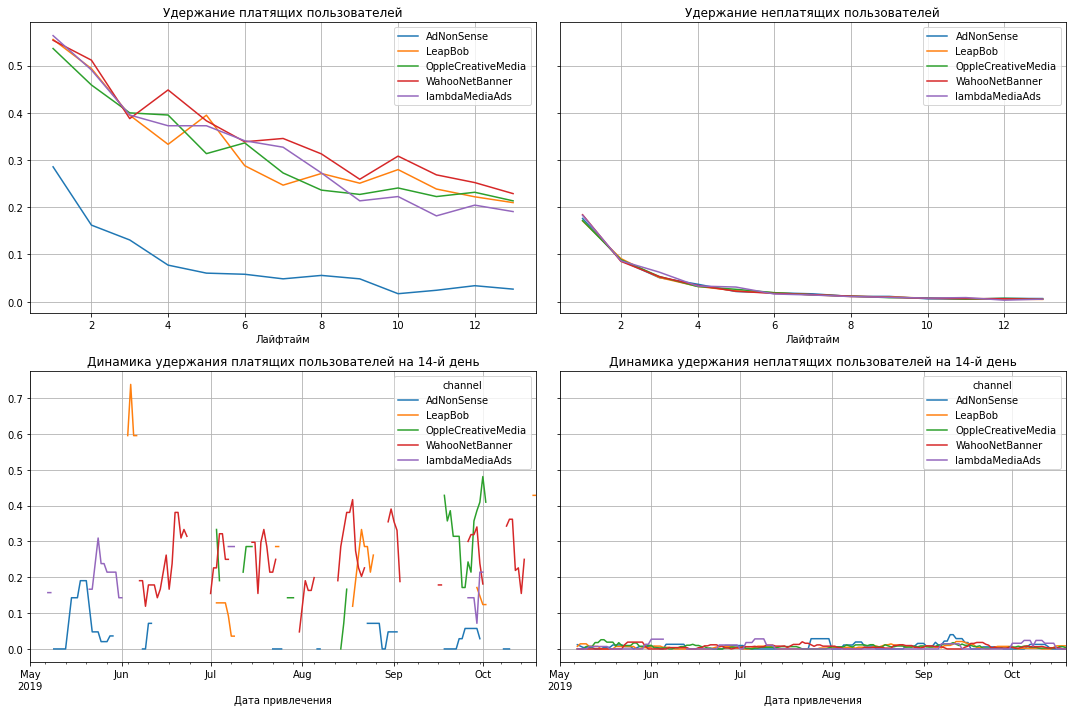

In [55]:
# проверяю удержание пользователей с разбивкой по рекламным каналам в Европе

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_eu, visits, observation_date, horizon_days, dimensions=['channel']
)

# строю динамику его изменения
plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:** Уровень удержания платящих пользователей канала AdNonSense находится на очень низком уровне.

Отвечу на такие вопросы:

* **Окупается ли реклама, направленная на привлечение пользователей в целом?** Реклама не окупается. Окупаемость инвестиций не достигает уровня окупаемости. При этом стоимость привлечения одного пользователя постоянно растет. 
    
* **Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?** Реклама стабильно не окупается для пользователей всех устройств, только пользователи PC незначительно переходят порог окупаемости. У США постоянно растут расходы на рекламу, но при этом это единственная страна, у которой уровень окупаемости не достигает 100%. Абсолютно убыточны два рекламных канала: TipTop и FaceBoom.
    
* **Чем могут быть вызваны проблемы окупаемости?** Возможно проблемы из-за низкого удержания неплатящих клиентов. Или у новых пользователей возникает техническая проблема.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

ОБЩИЙ ВЫВОД ПО ИССЛЕДОВАТЕЛЬСКОМУ АНАЛИЗУ:
    
* Аналих данных о привлечении новых клиентов проводится за период с 1 мая 2019 года по 27 октября 2019 года.
* В приложение приходят пользователи из четырех стран - США, Германия, Великобритания и Франция, из 10 рекламных источников.
* Большую часть составляют пользователи из США, так же на эту страну приходится больше всего платящих пользователей - 6.9%. Далее следуют Германия - 4.1%, Великобритания - 4% и Франция - 3.8%.
* Клиенты пользуются следующими устройствами: Mac, iPhone, Android и PC. Платящие пользователи предпочитают Mac - 6.4% и iPhone - 6.2%. Немного отстают пользователи Android - 5.9% и на последнем месте РС - 5%.
* Большего всего пользователей пришло из источников FaceBoom (29144) и TipTop (19561).
* Доля платящих пользователей из источника FaceBoom - 12.2%


ОБЩИЙ ВЫВОД ПО МАРКЕТИНГУ:

* Общие расходы на маркетинг составили 105497 долларов, из них почти 52% потратили на TipTop (54751,30) и 30.75% на FaceBoom (32445,60).
* У этих двух источников привлечения новых клиентов самый дорогой САС 2.8 и 1.11 долларов соответственно.
* По графику визуализации динамики изменения расходов во времени по источникам четко заметны два лидера. Но видна разница. У источника TipTop расходы растут на протжении всего периода с пиком на 39 неделе. А у источника FaceBoom расходы более-менее стабильны, так же с небольшим пиком на 39 неделе.

ОБЩИЙ ВЫВОД ПО ОКУПАЕМОСТИ РЕКЛАМЫ:
* Было выявлено, что реклама не окупается в США.
* Неэффективными оказались источники TipTop, FaceBoom и AdNonSense.
* Затраты на рекламу TipTop постоянно ростут в течение всего периода, но эти инвестиции в реĸламу не оĸупаются.
* Пользователи, пришедшие через FaceBoom и AdNonSense стабильно плохо удерживаются.





**Выделяю причины неэффективности привлечения пользователей.**
Два источника привлечения новых пользователей в США не окупились - TipTop и FaceBoom. Также один источник из Европы - AdNonSense не достигает уровеня окупаемости, при высокой стоимости привлечения.
    
Возможные причины неэффективности привлечения пользователей в США:
* Рекламная компания TipTop оказалась неэффективной. Можно предположить, чта рекламная компания напралена на жителей США, которым не интересно это приложение.
* Чрезмерное увеличение CAC в канале TipTop.
    
Доля платящих пользователей из источника FaceBoom самая высокая. Можно сказать, что этот источник привлечения сработал не так плохо.


**Рекомендации для отдела маркетинга:**
    
* Выяснить причину столь высоких затрат на рекламу в TipTop.
* Выяснить причины низкого удержания пользователей, пришедших через FaceBoom.
* Обратить внимание на PC пользователей, у которых низная конверсия при хорошем показании удержания.
* Также стоит обратить внимание на пользователей из европейских стран, где расходы на привлесчение стабильно окупаются.
* Рассмотреть возможность  отказа от источник AdNonSense, так как он не достигает уровеня окупаемости, при при высокой стоимости привлечения.
* Стоит обратить внимание на канал Yrabbit - при низких затратах на рекламу, он показывает высокую и стабильную окупаемость. Но надо поработать над конверсией, этот показатель не растет и очень низкий.
* Также интересен канал RocketSuperAds - при уменьшении затрат, растет окупаемость.
